In [1]:
from pathlib import Path
from tempfile import TemporaryDirectory

import numpy as np
import matplotlib.pyplot as plt
import flopy
import pandas as pd
import shutil
import os

In [5]:
model_ws = Path('C:\\Users\\swan47\\AppData\\Local\\Temp\\_T1029174006_wasaga_g_c1clv5')
model = flopy.modflow.Modflow.load('wasaga.nam', model_ws=model_ws)

In [6]:
dis = model.dis
nrow = dis.nrow
ncol = dis.ncol
nlay = dis.nlay

nper = model.dis.nper

In [15]:
Path(model_ws) /  'wasaga.hds'

WindowsPath('C:/Users/swan47/AppData/Local/Temp/_T1029174006_wasaga_g_c1clv5/wasaga.hds')

Text(0, 0.5, 'Elevation (m.a.s.l)')

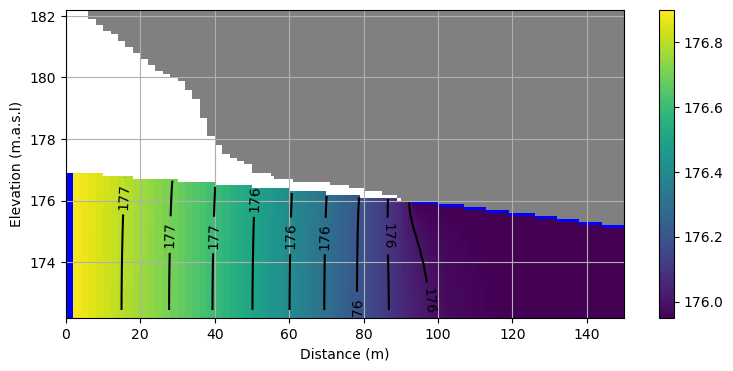

In [34]:
fig = plt.figure(figsize=(9, 4))
xsect = flopy.plot.PlotCrossSection(model=model, line={"Row": 0})

hds = flopy.utils.binaryfile.HeadFile(Path(model_ws) /  'wasaga.hds')
head_data = hds.get_data(kstpkper=(0, 0)) # (time step, stress period)

ibd = model.bas6.ibound.array
masked_head_data = np.ma.masked_where(ibd== 0, head_data)

cs = xsect.plot_array(masked_head_data, cmap="viridis")
plt.colorbar(cs)

contour_levels = np.arange(175,178, 0.1)
contour_set = xsect.contour_array(masked_head_data, levels=contour_levels, colors="black")
plt.clabel(contour_set, inline=True, fontsize=10, fmt="%1.0f")
plt.grid()

ibd = xsect.plot_ibound(color_noflow='grey')
#ibd.set_facecolor("red")  # set the color of the masked cells to grey


#xs = drn_ys
#ys = [ lay_to_meter(locate_ground_surface_lay(meter_to_row(y))) for y in drn_ys]
#plt.scatter([x - 0.0 for x in xs],[y- 0.0 for y in ys],c='r',marker='s',s=5)
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m.a.s.l)')
